# k-means(cluster) 군집화

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_g= "https://github.com/dongupak/DataML/raw/main/csv/game_usage.csv"
game_usage = pd.read_csv(data_g)
game_usage.head(3)

,time spent,game level
0,39,944
1,55,705
2,29,757


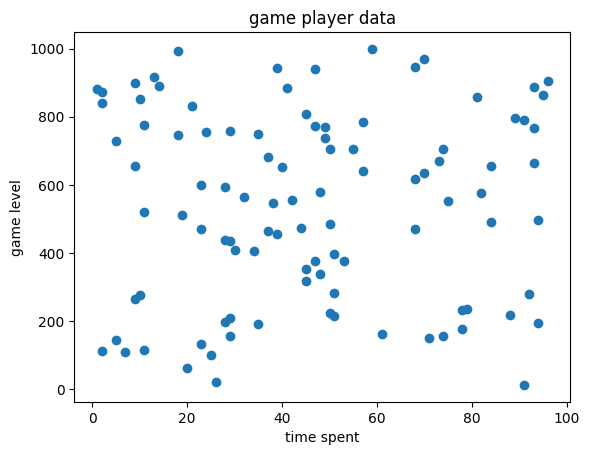

In [ ]:
x = game_usage['time spent']
y = game_usage['game level']

plt.title('game player data')
plt.xlabel('time spent')
plt.ylabel('game level')
plt.scatter(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


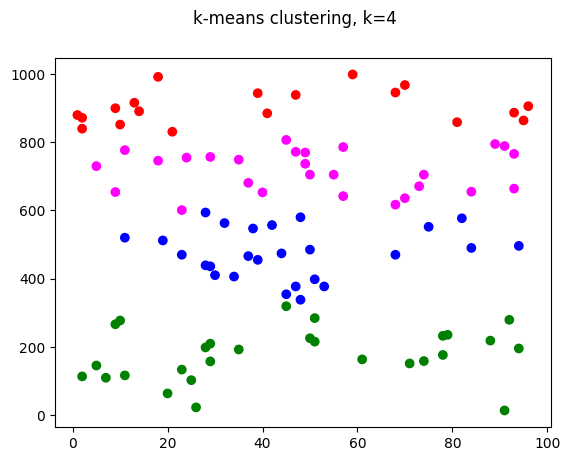

In [ ]:
from sklearn import cluster #군집화

def kmeans_predict_plot(data,k):
  model = cluster.KMeans(n_clusters=k)
  model.fit(data)
  labels = model.predict(data)
  colors = np.array(['red','green','blue','magenta'])
  plt.suptitle('k-means clustering, k={}'.format(k))
  plt.scatter(data[:,0],data[:,1],color=colors[labels])

gamer_data = np.column_stack((x,y))
kmeans_predict_plot(gamer_data, k=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(0.0, 1000.0)

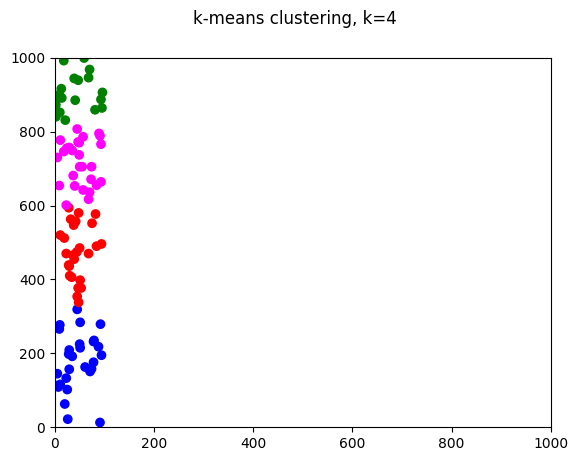

In [ ]:
kmeans_predict_plot(gamer_data, k=4)
plt.xlim(0,1000); plt.ylim(0,1000)

# k-means데이터 정규화 방법 이용

In [ ]:
from sklearn.preprocessing import MinMaxScaler # 최대1,최소0으로 스케일링

scaler = MinMaxScaler()
scaler.fit(gamer_data)
n_data = scaler.transform(gamer_data) # gamer_data를 0에서 1사이 값으로 
n_data[:,0].mean(),n_data[:,1].mean()

(0.4731578947368421, 0.5324949290060852)

In [ ]:
n_data[:,0].min(),n_data[:,0].max() #모든 데이터는 0에서 1사이의값 가짐

(0.0, 1.0)

In [ ]:
n_data[:,1].min(),n_data[:,1].max()

(0.0, 1.0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


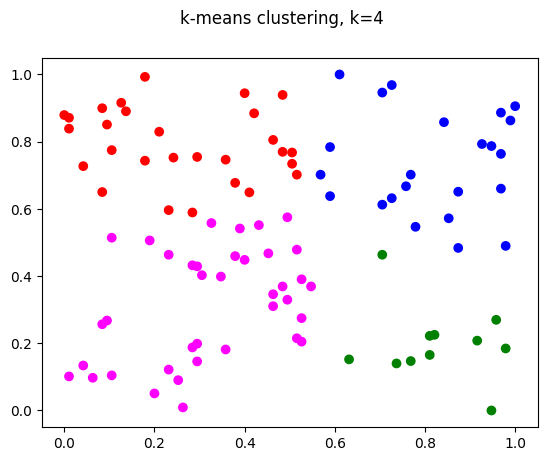

In [ ]:
kmeans_predict_plot(n_data, k=4) #4개의 군집/ 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler #기본적인 스케일러

standardScaler = StandardScaler()
standardScaler.fit(gamer_data)
gamer_data_scaled = standardScaler.transform(gamer_data)

print(gamer_data_scaled[:,0].std(),",", gamer_data_scaled[:,1].std()) #표준편차
print(gamer_data_scaled[:,0].mean(),",", gamer_data_scaled[:,1].mean())

1.0000000000000002 , 1.0
-1.1435297153639113e-16 , 1.1546319456101628e-16


# k-nn 분류(neighbors)

* k-nn 활용 - 붓꽃

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
print(iris_df['target'].value_counts())
print(iris_df.head().values)

0    50
1    50
2    50
Name: target, dtype: int64
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]


* train, test로 나눈 데이터

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

x = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

def iris_knn(x,y,k):
  xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size =0.3) 
  # test_size 안하면  default로 잡음
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(xtrain, ytrain)
  y_pred= knn.predict(xtest)
  return metrics.accuracy_score(ytest,y_pred)

k=3
scores = iris_knn(x,y,k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k,scores))

n_neighbors가 3일때 정확도: 0.956


* 나누지 않은 모든 데이터


In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k=3
iris = load_iris()
knn=KNeighborsClassifier(n_neighbors=k) #사용가능한 모든 데이터 사용
knn.fit(iris.data, iris.target)

y_pred_all = knn.predict(iris.data)
scores=  metrics.accuracy_score(iris.target, y_pred_all)
print("n_neighbors가 {0:d}일떄 정확도:{1:.3f}".format(k,scores))

n_neighbors가 3일떄 정확도:0.960


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


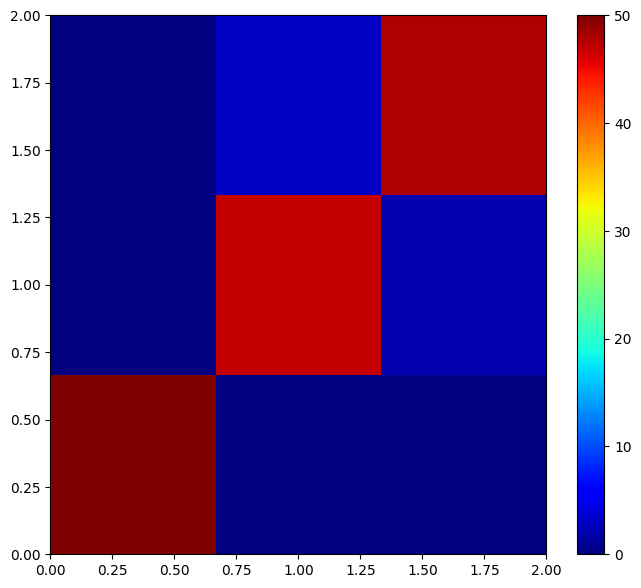

In [ ]:
import matplotlib.pyplot as plt

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size =0.3) 
# test_size 안하면  default로 잡음
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain, ytrain) #훈련시키기
y_pred= knn.predict(xtest) #테스트값 예측하기
y_pred_all = knn.predict(iris.data) #전체값예측

#오류를 알 수 있는 시각적 그래프
fig = plt.figure(figsize=(8,7))
h = plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap = plt.cm.jet)
cur_ax = plt.gca()
fig.colorbar(h[3], ax = cur_ax)
plt.show()

# SVM

* iris svm 분류

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[:3]
type(iris.data)
iris.data.shape
iris.feature_names
# iris.target #구별해주는 data

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
#iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
x2 = iris.data[50:, 2:]
y2 = iris.target[50:] -1
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#svm 선형분리 학습
from sklearn.svm import SVC

#sm = SVC(kernel='linear'. C = 1e10)
model1 = SVC(kernel='linear').fit(x2,y2)

#정밀도,재현율,가중조화평균..등 나타
from sklearn.metrics import classification_report
print(model1.predict(x2))
print(classification_report(y2, model1.predict(x2)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.94      0.96      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



* 유방암 svm분류


In [ ]:
#유방암
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

x_train, x_test,y_train,y_test = train_test_split(\
    breast_cancer_data,breast_cancer_label,test_size=0.2)

In [ ]:
#표준화(StandardScaler) 및 학습, 예측
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = Pipeline([('scaler', StandardScaler()), \
 ('decitiontree', DecisionTreeClassifier())])
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test) #테스트 데이터에 대한 예측
print('예측 정확도: %.2f' %accuracy_score(y_test, y_pred))


#SVM 학습 
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain, ytrain)

#테스트 데이터 예측수행
from sklearn.metrics import accuracy_score
y_pred = svc.predict(xtest)
print('예측 정확도: %.2f' % accuracy_score(ytest, y_pred))


예측 정확도: 0.96


In [ ]:
#svm 선형분리
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.svm import SVC

x = load_breast_cancer()
cancer = pd.DataFrame(data = x.data, columns = x.feature_names)
cancer['target'] = x.target
X = cancer.iloc[:,:-1]
y = cancer.iloc[:,-1]

#svm 선형분리학습
svm = SVC(kernel = 'linear')
#svm = SVC(kernel="linear", C=0.1)
svm.fit(X, y)

#정밀도,재현율,가중조화평균..등 나타
from sklearn.metrics import classification_report
print(classification_report(y, svm.predict(X)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       212
           1       0.97      0.98      0.97       357

    accuracy                           0.97       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.97      0.97      0.97       569

